Epoch 1/100


c:\Users\thame\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 126ms/step - loss: 0.0639 - val_loss: 0.1888
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0358 - val_loss: 0.1015
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0165 - val_loss: 0.0396
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0091 - val_loss: 0.0106
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0096 - val_loss: 0.0054
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0108 - val_loss: 0.0070
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0088 - val_loss: 0.0129
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0076 - val_loss: 0.0201
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0061 - val_loss: 0.0246
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0080 - val_loss: 0.0238
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0071 - val_loss: 0.0195
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0068 - val_loss: 0.0142


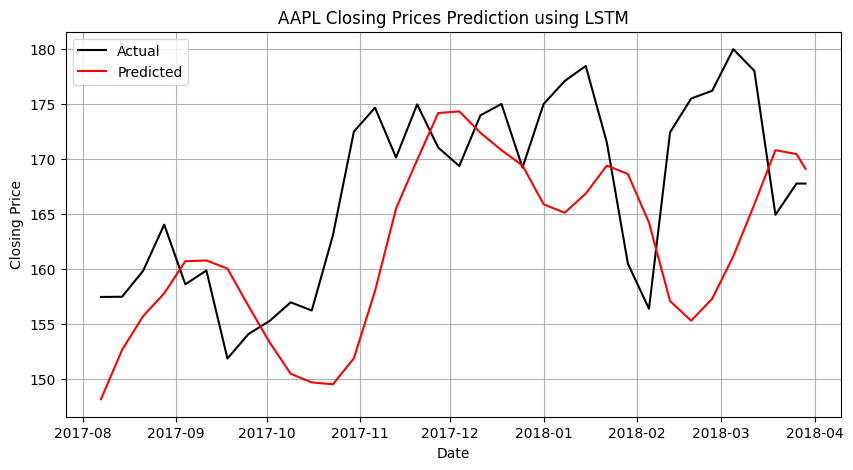

R-squared score: -0.40862321840941673


In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import r2_score
import numpy as np

# Loading the data
file_path = "C:\\Users\\thame\\Downloads\\AAPL.csv"
df = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

# Scaling the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

# Reshape data for LSTM model
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X[i:(i + time_steps)]
        Xs.append(v)
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 10
X, y = create_dataset(scaled_data, scaled_data, time_steps)

# Splitting the data into train and test sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Building the LSTM model
model = Sequential([
    LSTM(units=50, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    Dense(units=1)
])

model.compile(optimizer='adam', loss='mse')

# Training the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=1, shuffle=False)

# Predicting the closing prices for the test data
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Plotting the actual and predicted closing prices
plt.figure(figsize=(10, 5))
plt.plot(df.index[split+time_steps:], df['Close'][split+time_steps:], color='black', label='Actual')
plt.plot(df.index[split+time_steps:], predictions, color='red', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('AAPL Closing Prices Prediction using LSTM')
plt.legend()
plt.grid(True)
plt.show()

# Evaluating the R2 score of the model
r2_score_value = r2_score(df['Close'][split+time_steps:], predictions)
print(f'R-squared score: {r2_score_value}')
